# CryptoPETS

PETS is the character set used by early Commodore computers e.g. the Commodore C64. It is comfortingly familiar to the very elder millenials and genX engineers. Cryptopunx are the Cryptopunks. CryptoPETS are the hybrid of both. 

In [10]:
import hashlib
import json
import numpy as np
import pickle
import random
import os

In [5]:
import matplotlib.pyplot as plt
import cpunks.cpunks10k as cpunks10k
import cpunks.utils as utils
%matplotlib inline

In [34]:
image_dir = os.path.dirname(cpunks10k.__file__) + '/tutorial/images'
data_dir  = os.path.dirname(cpunks10k.__file__) + '/data'

In [36]:
_colors = None
_imgmap = None

with open(f"{data_dir}/_colors_count.pickle", 'rb') as f:
    _colors = pickle.load(f)
sorted_colors=utils.sort_dict_by_function_of_value(_colors)

In [39]:
d={}
i=1
for k in sorted_colors.keys():
    hexkey = utils.color_str_to_hex(k)
    d[hexkey]={
        'original_key': k,
        'id': i,
        'name': hexkey,
        'punks': _colors[k]
    } 
    i = i + 1

In [6]:
def bloc_party(input_arr, selector):
    return np.block([[selector(i) for i in j] for j in input_arr])

In [171]:
def get_tile_images(image, width=8, height=8):
    _nrows, _ncols, depth = image.shape
    _size = image.size
    _strides = image.strides

    nrows, _m = divmod(_nrows, height)
    ncols, _n = divmod(_ncols, width)
    if _m != 0 or _n != 0:
        return None

    return np.lib.stride_tricks.as_strided(
        np.ravel(image),
        shape=(nrows, ncols, height, width, depth),
        strides=(height * _strides[0], width * _strides[1], *_strides),
        writeable=False
    )

def rgb2gray(rgb):
    weights = [0.2989, 0.5870, 0.1140]
    img = np.dot(rgb[...,:3], weights)
    return np.where(img > 0.01, 1, img)


In [40]:
import matplotlib.image as mpimg
petscii = mpimg.imread(f"{image_dir}/petscii.png")

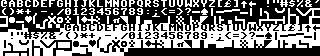

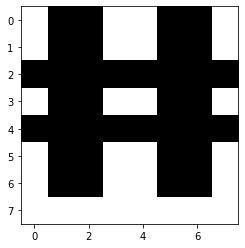

In [172]:
PETS_ = get_tile_images(petscii, width=8, height=8)
PETS_  = PETS_.reshape(280,8,8,4)#.astype(np.uint8)
cmap = plt.get_cmap('gray')

PETS_GRAY = np.array([rgb2gray(img) for img in PETS_])
plt.imshow(PETS_GRAY[163], cmap=cmap)

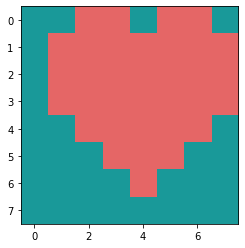

In [183]:

def colorstr_to_nparray(c):
    return np.fromstring(c[1:-1], float, sep=' ')

def complement(c):
    """c is a 4 chan color of type ndarray(4,)
       returns the complementary color and sets
       transparency off.
    """
    d = 1 - c
    d[3] = 1.
    return d

def gray_to_color(img, fg, bg):
    'takes a 2D black and white image and returns a 3D color image.'
    (x,y) = img.shape[0:2]
    d={0:bg, 1:fg}
    return np.block([[d[i] for i in j] for j in img]).reshape(x, y, 4)

fg = colorstr_to_nparray('[0.9 0.4 0.4        1.        ]')
bg = complement(fg)
img = PETS_GRAY[83]

img_c = gray_to_color(img, fg, bg)
plt.imshow(img_c)

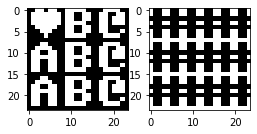

In [185]:
square = np.array([[83, 2, 0],[1, 2, 0], [1, 2, 0]])
all_hash = np.array([[163, 163, 163],[163, 163, 163], [163, 163, 163]])

fig = plt.figure(figsize=(4,8))
fig.add_subplot(1,2, 1)
plt.imshow(bloc_party(square, lambda i: PETS_GRAY[i]), cmap=cmap)
fig.add_subplot(1,2, 2)
plt.imshow(bloc_party(all_hash, lambda i: PETS_GRAY[i]), cmap=cmap)

In [627]:
punk_to_c64 = {}
punk_to_c64[221] = 160
punk_to_c64[197] = 163
punk_to_c64[219] = 83
punk_to_c64[222] = 92  #rnd
punk_to_c64[104] = 54
punk_to_c64[103] = 63
punk_to_c64[195] = 90

def p64(i):
    '''if found, return a character from the lookup table or return random'''
    try:
        return PETS_GRAY[punk_to_c64[i]]
    except:
        r = random.randint(30,240)
        punk_to_c64[i] = r
        return PETS_GRAY[r]

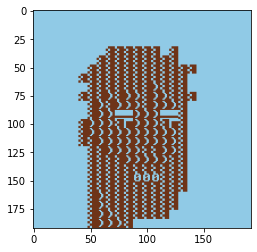

In [756]:
d = {0: C, 1: B}

punk = X_train_cm[8]

def get_image_block(img, fg, bg):
    img_c = gray_to_color(img, fg, bg)
    return [img_c]

def get_random_color():
    c = np.random.rand(4,)
    c[3] = 1.
    return c

# (dim*i) + 3 + j

def get_image(img, fg, bg):
    dim=24
    fg = get_random_color()
    bg = complement(fg)
    t = [[get_image_block(p64(punk[j][i]),
                          bg,
                          fg) for i in range(0,dim)] for j in range(0,dim)]
    return np.block(t)

plt.imshow(get_image(punk, fg, bg))


In [44]:
cpunx = cpunks10k.cpunks10k()
(X_train, Y_train), (X_test, Y_test), (labels) = cpunx.load_data()

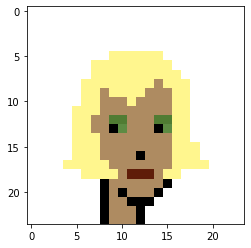

In [45]:
plt.imshow(X_train[0])

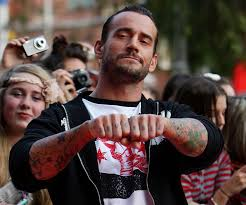

In [47]:
class Colormap:
    def __init__(self, d):
        self.d = {d[k]['original_key'] : d[k]['id'] for k in d.keys()}
        self.d_ = {int(d[k]['id']) : d[k]['original_key'] for k in d.keys()}
        self.d['[0. 0. 0. 0.]'] = 221
        self.d_[221] = '[0. 0. 0. 0.]'
        
    def get_rgbt(self, i):
        return self.d_[i]
    
    def get_id(self, rgbt):
        return self.d[rgbt]
    
    def cm_punk(punk):
        '''convert a (24,24,4) punk to a (24,24) encoded punk using cm'''
        return np.array([[self.get_id(str(y)) for y in x] for x in punk])


cm = Colormap(d)

# test it
(
    cm.get_id('[0.35686275 0.28627452 0.2        1.        ]') == 1,
    cm.get_rgbt(1) == '[0.35686275 0.28627452 0.2        1.        ]' 
)



(True, True)

In [599]:
# generate the first 500
X_train_cm = [cm_punk(img, cm) for img in X_train[0:500]]

In [80]:
# bg 221
# hair 197
# skin 219
# ? 222
# eyes_1 104
# eyes_2 103
# mouth 195
punk_to_c64 = {}
punk_to_c64[221] = 160
punk_to_c64[197] = 163
punk_to_c64[219] = 83
punk_to_c64[222] = 92  #rnd
punk_to_c64[104] = 54
punk_to_c64[103] = 63
punk_to_c64[195] = 90

def p64(i):
    '''if found, return a character from the lookup table or return random'''
    try:
        return PETS_GRAY[punk_to_c64[i]]
    except:
        r = random.randint(30,240)
        punk_to_c64[i] = r
        return PETS_GRAY[r]

In [131]:
#PETS_GRAY[1]
X_train_cm[1]
cm.get_rgbt(217)

'[0.44313726 0.24705882 0.11372549 1.        ]'

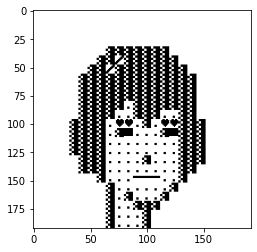

In [598]:
c64_punks = [bloc_party(X_train_cm[i], lambda x: p64(x)) for i in range(64,320)]
plt.imshow(c64_punks[97], cmap=cmap)

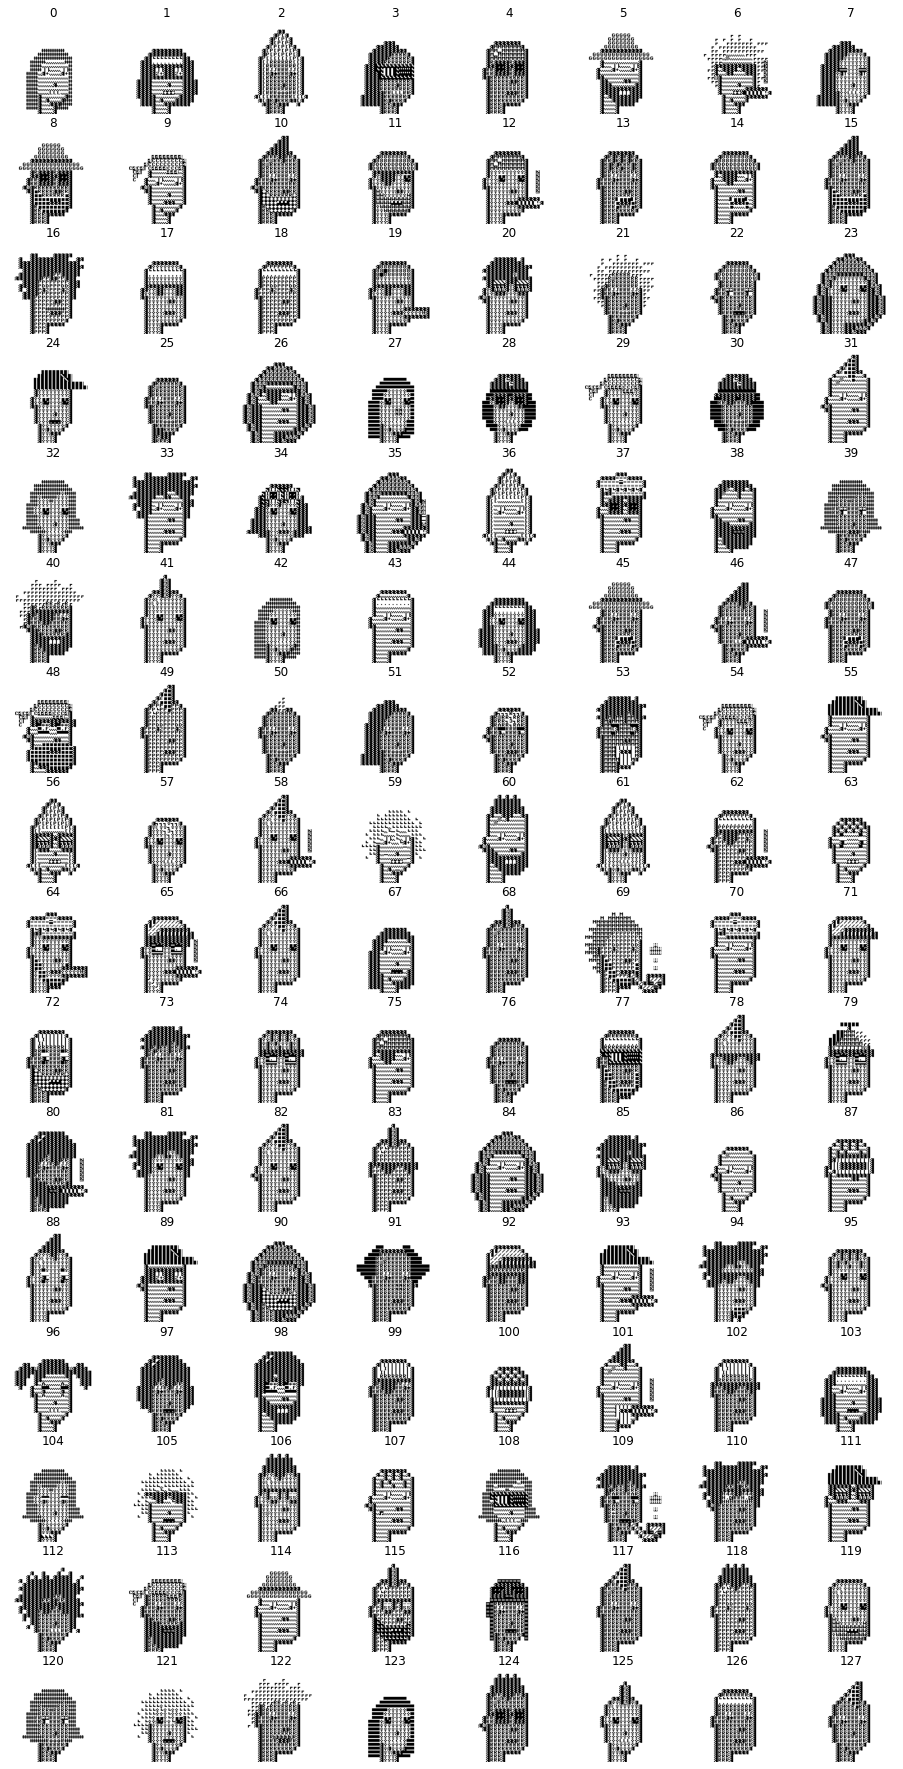

In [68]:
n=8  
(x,y) = (n*2,n)
# create figure
fig = plt.figure(figsize=(x,y*4))


for i in range(0,128):
    fig.add_subplot(x, y, i+1)
    plt.imshow(c64_punks[i], cmap=cmap)
    plt.axis('off')
    plt.title(i)